# PHYS-F302 : Projet Stokes Flow 
# Saerens Henri et Musibau Solomon

## **INTRODUCTION**

Dans ce travail, nous allons discuter de l'hypothèse d'écoulements de Stokes qui est valide pour des écoulements à faibles nombres de Reynolds. Sous cette hypothèse on peut simplifier les équations de Navier-Stokes pour obtenir l'équation biharmonique pour la "stream function" (fonction de courant) qui est une fonction qui permet d'obtenir les trajectoires des particules en écoulement stationnaire. Plus précisément, nous allons résoudre un problème appellé "lid-driven cavity flow" à l'aide d'un algorithme : la méthode du gradient conjugué. 


Considérons une cavité de forme carré remplie d'un fluide, dont les parois gauche, droite et inférieure sont immobiles, tandis que la paroi supérieure sera déplacée à vitesse constante $u=1$ en supposant que le fluide ne puisse s'échapper de la cavité.

Le but sera de visualiser le champ de courant créé à l'intérieur de cette cavité suite au mouvement constant de la paroi supérieure, et ceci pourra être considéré comme un état stationnaire.

On va alors chercher à décrire l'écoulement de Stokes dans cette cavité de forme carré.

Dans ce but, nous allons résoudre numériquement l'équation biharmonique provenant des équations de Navier-Stokes suivante:

\begin{equation}
\nabla^4\psi=0
\end{equation}

où $\psi$ représente la "stream function", ou "fonction de courant" et est définie par:

\begin{equation}
u=\frac{\partial\psi}{\partial y} \text{       et       } v=-\frac{\partial \psi}{\partial x}
\end{equation}
$u$ et $v$ étant les composantes de la vitesse d'écoulement.

## Conditions aux bords 

Comme imposé dans l'énoncé, les condtions aux bords pour ce problème seront les suivantes:

-Pour le bord inférieur: $\psi=0$ et $\frac{\partial \psi}{\partial y}=0$

-Pour le bord supérieur: $\psi=0$ et $\frac{\partial \psi}{\partial y}=1$

-Pour le bord gauche: $\psi=0$ et $\frac{\partial \psi}{\partial x}=0$

-Pour le bord droit: $\psi=0$ et $\frac{\partial \psi}{\partial x}=0$

On peut justifier ces conditions de la manière suivante:

On peut supposer le bord comme une ligne de courant refermée sur elle même. En ce qui concerne la valeur de $\psi$ le long de cette ligne, cela n'a pas beaucoup d'importance, donc pour simplifier le problème on peut se permettre de prendre $\psi=0$ sur les bords.

En ce qui concerne les conditions de Neuman, on dit dans l'énoncé que seule la paroi supérieure se déplace à une vitesse constante $u=1$ tandis que les autres sont fixes. Or $u=\frac{\partial \psi}{\partial y}$, on a donc bien $\frac{\partial \psi}{\partial y}=1$, et sur les bords on a bien 0 car les parois sont fixes.

## **Discrétisation de l'équation biharmonique**

Le but du travail est de résoudre l'équation biharmonique pour $\psi$ de manière numérique, pour cela on va utiliser la *Méthode du Gradient Conjugué* qui permet de résoudre un système d'équations linéaires dont la matrice associée est symétrique et définie positive, ce qui est le cas pour notre problème contenant l'opérateur linéaire Bilaplacien (voir module 5.04).

Avant tout, nous devons discrétiser l'équation biharmonique à partir d'une discrétisation centrale du second ordre.

Tout d'abord, le Laplacien de $\psi$ est donné par:
$$\Delta\psi=\frac{\partial^2 \psi}{\partial^2 x}+ \frac{\partial^2 \psi}{\partial^2 y}$$

On discrétise cela avec une discrétisation centrée d'ordre 2: 

$$\Delta \psi=\frac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}+\frac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}$$

où les $\psi_{i,j}$ sont les valeurs de la stream function aux coordonnées $(i,j)$ du carré.

On cherche maintenant à trouver $\Delta(\Delta \psi)$. On va donc déterminer la discrétisation pour chacun des termes ci-dessus:


$$\Delta \psi_{i+1,j}=\frac{\psi_{i+2,j}-2\psi_{i+1,j}+\psi_{i,j}}{\Delta x^2}+\frac{\psi_{i+1,j+1}-2\psi_{i+1,j}+\psi_{i+1,j-1}}{\Delta y^2}$$

$$\Delta \psi_{i,j}=\frac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}+\frac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}$$

$$\Delta \psi_{i-1,j}=\frac{\psi_{i,j}-2\psi_{i-1,j}+\psi_{i-2,j}}{\Delta x^2}+\frac{\psi_{i-1,j+1}-2\psi_{i-1,j}+\psi_{i-1,j-1}}{\Delta y^2}$$

$$\Delta \psi_{i,j+1}=\frac{\psi_{i+1,j+1}-2\psi_{i,j+1}+\psi_{i-1,j+1}}{\Delta x^2}+\frac{\psi_{i,j+2}-2\psi_{i,j+1}+\psi_{i,j}}{\Delta y^2}$$

$$\Delta \psi_{i,j-1}=\frac{\psi_{i+1,j-1}-2\psi_{i,j-1}+\psi_{i-1,j-1}}{\Delta x^2}+\frac{\psi_{i,j}-2\psi_{i,j-1}+\psi_{i,j-2}}{\Delta y^2}$$


Ayant toutes ces relations, on peut développer $\Delta(\Delta \psi)$:

$$\Delta(\Delta \psi)=\Delta \left(\frac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}\right)+\Delta \left(\frac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}\right)\\ =\frac{1}{\Delta x^2}\left(\Delta\psi_{i+1,j}-2\Delta\psi_{i,j}+\Delta\psi_{i-1,j}\right)+
\frac{1}{\Delta y^2}\left(\Delta\psi_{i,j+1}-2\Delta\psi_{i,j}+\Delta\psi_{i,j-1}\right)$$

Or dans notre cas, on a $\Delta x=\Delta y$ et aussi $\nabla^4\psi=\Delta(\Delta \psi)=0$, ainsi:

$$\Delta(\Delta \psi)=\Delta\psi_{i+1,j}-4\Delta\psi_{i,j}+\Delta\psi_{i-1,j}+\Delta\psi_{i,j+1}+\Delta\psi_{i,j-1}=0$$

En tenant compte de tout les résultats ci-dessus, on trouve:

$$0=\left[\psi_{i+2,j}-2\psi_{i+1,j}+\psi_{i,j}+\psi_{i+1,j+1}-2\psi_{i+1,j}+\psi_{i+1,j-1} \right]-4\left[\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}+\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1} \right]+\left[\psi_{i,j}-2\psi_{i-1,j}+\psi_{i-2,j}+\psi_{i-1,j+1}-2\psi_{i-1,j}+\psi_{i-1,j-1} \right]+\left[\psi_{i+1,j+1}-2\psi_{i,j+1}+\psi_{i-1,j+1}+\psi_{i,j+2}-2\psi_{i,j+1}+\psi_{i,j} \right]+\left[\psi_{i+1,j-1}-2\psi_{i,j-1}+\psi_{i-1,j-1}+\psi_{i,j}-2\psi_{i,j-1}+\psi_{i,j-2} \right]$$

L'expression finale de la discrétisation de notre équation biharmonique est finalement donnée par:

$$0=20\psi_{i,j}-8\psi_{i+1,j}-8\psi_{i-1,j}-8\psi_{i,j+1}-8\psi_{i,j-1}+2\psi_{i+1,j+1}+2\psi_{i+1,j-1}+2\psi_{i-1,j+1}+2\psi_{i-1,j-1}+\psi_{i+2,j}+\psi_{i-2,j}+\psi_{i,j+2}+\psi_{i,j-2}$$

## **Discrétisation des conditions aux bords**

Avant d'implémenter les conditions aux bords dans la méthode du gradient conjugué, nous allons également discrétiser les conditions aux bords via la discrétisation forward/backward du second ordre (source : https://en.wikipedia.org/wiki/Finite_difference_coefficient) :


$\bullet$ Pour le bord gauche:
$$0=\frac{\partial \psi}{\partial x}=\frac{\frac{-3}{2}\psi_{0,j}+2\psi_{1,j}-\frac{1}{2}\psi_{2,j}}{\Delta x}$$
Ce qui donne:
$$\psi_{1,j}=\frac{1}{4}\psi_{2,j}$$

sachant que $\psi$ est nulle sur les bords.

$\bullet$ Pour le bord inférieur:
$$0=\frac{\partial \psi}{\partial y}=\frac{\frac{-3}{2}\psi_{i,0}+2\psi_{i,1}-\frac{1}{2}\psi_{i,2}}{\Delta y}$$
Ce qui donne:
$$\psi_{i,1}=\frac{1}{4}\psi_{i,2}$$

$\bullet$ Pour le bord droit:
$$0=\frac{\partial \psi}{\partial x}=\frac{\frac{3}{2}\psi_{n_x,j}-2\psi_{n_x-1,j}+\frac{1}{2}\psi_{n_x-2,j}}{\Delta x}$$
Ce qui donne:
$$\psi_{n_x-1,j}=\frac{1}{4}\psi_{n_x-2,j}$$

$\bullet$ Pour le bord supérieur:
$$1=\frac{\partial \psi}{\partial y}=\frac{\frac{3}{2}\psi_{i,n_y}-2\psi_{i,n_y-1}+\frac{1}{2}\psi_{i,n_y-2}}{\Delta y}$$
Ce qui donne:
$$\psi_{i,n_y-1}=\frac{-1}{2}(\Delta y-\frac{1}{2}\psi_{i,n_y-2})$$

avec $n_x,n_y$ le nombre de discrétisation dans la direction $x$ et $y$. 

On peut maintenant implémenter nos conditions initiales et conditions de bords.

In [25]:
#On importe les outils nécéssaires à la réalisation de nos algorithmes
import numpy
from math import pi
%matplotlib inline
from matplotlib import pyplot, cm, rcParams

Tout d'abord, on impose les dimensions de notre cavité, et aussi la discrétisation par rapport à laquelle on va résoudre notre équation. On note également la valeur maximale que l'on veut pour la différence en norme L1 entre deux itérations successives dans la méthode du gradient conjugué. 

In [26]:
l = 1.
h = 1.

nx = 41
ny = 41

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-8 

On implémente une fonction qui va permettre de déterminer cette norme $L_1$ entre deux itérations succéssives :

In [27]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

Rappelons que l'équation biharmonique peut s'écrire sous forme de système linéaire:

$$A\textbf{p}=\textbf{b}$$
Cependant, dans notre cas, on se retrouve avec une équation homogène, c'est-à-dire que $\textbf{b}=0$, le système linéaire prend donc la forme suivante:

$$A\textbf{p}=0$$
On va donc imposer dans la cellule suivante que les valeurs de $b$ sont nulles partout.
On impose aussi que la solution est nulle partout initialement, et on implémente les conditions de Neuman sur les bords.

In [28]:
b=numpy.zeros((nx,ny))            #Dans notre cas, on a une équation homogène, ce qui implique que b=0 
p_i=numpy.zeros((nx,ny))           #On intialise la valeur de la solution à 0
p_i[0,:]=0 #bord inférieur        #Conditions de Dirichlet(on doit les imposer si p_i est différent de numpy.zeros)
p_i[:,0]=0 #bord gauche
p_i[-1,:]=0 #bord supérieur
p_i[:,-1]=0 #bord droit
p_i[-2,1:-1]=-(1/2)*(dy-0.5*p_i[-3,1:-1]) #bord supérieur      #Conditions de Neumann
p_i[1,1:-1]=0.25*p_i[2,1:-1]      #bord inférieur
p_i[1:-1,1]=0.25*p_i[1:-1,2]      #bord gauche
p_i[1:-1,-2]=0.25*p_i[1:-1,-3]    #bord droit

##  **Résolution de l'équation biharmonique par la méthode du gradient conjugué**


Maintenant que nous avons posé le "contexte" du problème ainsi que les conditions initiales , on peut passer à la résolution de celui-ci.

On implémente dans une fonction la méthode du gradient conjugué vue au cours.

** REMARQUES ** : Le code doit être modifié par rapport à celui du cours car ici on a des conditions de Dirichlet et Neumann à ajouter. Nous les appliquons à la fois à $p$ (solution $\psi$) et à $d$ (direction dans l'algorithme) car on voit dans la définition du gradient conjugué que $d$ porte un rôle similaire à celui de $p$. 

In [29]:
def conjugate_gradient_2d(p, b, dx, dy, l1_target):
    ny, nx = p.shape
    r  = numpy.zeros((ny,nx))
    Ad  = numpy.zeros((ny,nx)) 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    r[2:-2,2:-2] = b[2:-2,2:-2]-(20*p[2:-2,2:-2] - 8*p[2:-2,3:-1] - 8*p[3:-1,2:-2] - 8*p[2:-2,1:-3] \
                                 - 8*p[1:-3,2:-2] + 2*p[3:-1,3:-1] + 2*p[1:-3,3:-1] + 2*p[3:-1,1:-3] \
                                 + 2*p[1:-3,1:-3] + p[2:-2,4:] + p[:-4,2:-2] + p[2:-2,:-4] + p[4:,2:-2])/dx**4

    d = r.copy()
    #condition de dirichlet sur d
    d[0,:]=0
    d[:,0]=0
    d[-1,:]=0
    d[:,-1]=0
    #bord supérieur
    d[-2,1:-1]=(1/2)*(-dy+0.5*d[-3,1:-1])
    #bord inférieur
    d[1,1:-1]=0.25*d[2,1:-1]
    #bord gauche
    d[1:-1,1]=0.25*d[1:-1,2]
    #bord droit
    d[1:-1,-2]=0.25*d[1:-1,-3]
    
    rho = numpy.sum(r*r)
    
    Ad[2:-2,2:-2] = (20*d[2:-2,2:-2] - 8*d[2:-2,3:-1] - 8*d[3:-1,2:-2] - 8*d[2:-2,1:-3] - 8*d[1:-3,2:-2] \
                     + 2*d[3:-1,3:-1] + 2*d[1:-3,3:-1] + 2*d[3:-1,1:-3] + 2*d[1:-3,1:-3] + d[2:-2,4:] \
                     + d[:-4,2:-2] + d[2:-2,:-4] + d[4:,2:-2])/dx**4
   
    sigma = numpy.sum(d*Ad)
    
    # Iterations
    while l1_norm > l1_target:
        
    
        
        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        r = rk- alpha*Ad
        
        p[0,:]=0
        p[:,0]=0
        p[-1,:]=0
        p[:,-1]=0
        #Conditions de Neuman        
        #bord supérieur
        p[-2,1:-1]=(1/2)*(-dy+0.5*p[-3,1:-1])
        #bord inférieur
        p[1,1:-1]=0.25*p[2,1:-1]
        #bord gauche
        p[1:-1,1]=0.25*p[1:-1,2]
        #bord droit
        p[1:-1,-2]=0.25*p[1:-1,-3]
        
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        #condition de dirichlet sur d
        d[0,:]=0
        d[:,0]=0
        d[-1,:]=0
        d[:,-1]=0
        #bord supérieur
        d[-2,1:-1]=(1/2)*(-dy+0.5*d[-3,1:-1])
        #bord inférieur
        d[1,1:-1]=0.25*d[2,1:-1]
        #bord gauche
        d[1:-1,1]=0.25*d[1:-1,2]
        #bord droit
        d[1:-1,-2]=0.25*d[1:-1,-3]
        
        Ad[2:-2,2:-2] = (20*d[2:-2,2:-2] - 8*d[2:-2,3:-1] - 8*d[3:-1,2:-2] - 8*d[2:-2,1:-3] - 8*d[1:-3,2:-2] \
                         + 2*d[3:-1,3:-1] + 2*d[1:-3,3:-1] + 2*d[3:-1,1:-3] + 2*d[1:-3,1:-3] \
                         + d[2:-2,4:] + d[:-4,2:-2] + d[2:-2,:-4] + d[4:,2:-2])/dx**4
    
        sigma = numpy.sum(d*Ad)
        
        
        l1_norm = L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Nombre d itérations: {0:d}'.format(iterations))
    return p, l1_conv     

Appliquons donc cette méthode avec nos conditions initiales afin de déterminer la solution de l'équations biharmonique pour notre cavité : 

In [30]:
p, l1_conv = conjugate_gradient_2d(p_i.copy(), b, dx, dy, l1_target)

Nombre d itérations: 39554


Maintenant que nous avons calculé la solution de l'équation en tout point de notre domaine, on peut la représenter graphiquement afin d'avoir une meilleure vision du résultat.

**Remarque** : L'échelle de couleur à droite du graphique représente les valeurs de la solution, et n'a pas d'unités.

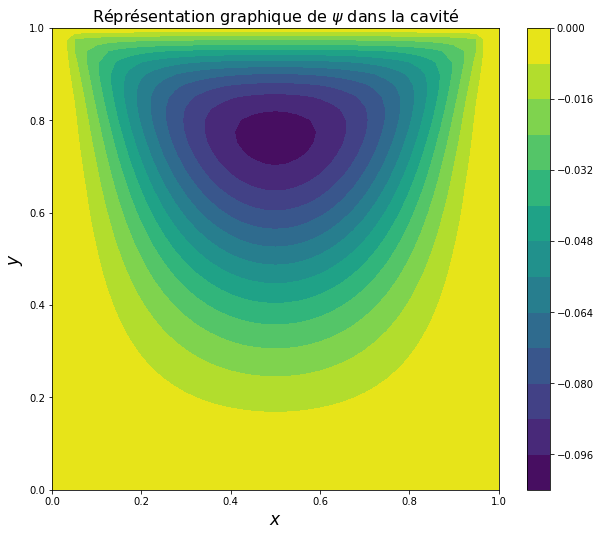

In [31]:
#Représentation graphique de la solution
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

pyplot.figure(figsize=(10,8.5))
pyplot.contourf(x,y,p,12,cmap=cm.viridis)
pyplot.xlabel('$x$', fontsize=17)
pyplot.ylabel('$y$', fontsize=17)
pyplot.title(r'Réprésentation graphique de $\psi$ dans la cavité', fontsize=16)
pyplot.colorbar();

Sur ce schéma, on observe une série de bandes de couleurs qui se referment sur elles-mêmes tout en circulant atour d'un point, qui est approximativement situé en $(x,y)=(0.5,0.8)$. Or on sait que chaque couleur représente une valeur de la fonction $\psi$ et que les lignes de valeurs constantes de $\psi$ sont des lignes de courant.

On a donc des lignes d'écoulement de fluide ciruclant autour d'un point de notre domaine.

## **Valeur de la stream function $\psi$ en certains points du domaine**

Regardons ce que vaut notre solution en certains points du domaine (x,y): (0.6,0.2), (0.6,0.4), (0.6,0.6), (0.6,0.8).

In [32]:
print('La valeur de la fonction de courant en (x,y)=(0.6,0.2) est:',p[8,24])
print('La valeur de la fonction de courant en (x,y)=(0.6,0.4) est:',p[16,24])
print('La valeur de la fonction de courant en (x,y)=(0.6,0.6) est:',p[24,24])
print('La valeur de la fonction de courant en (x,y)=(0.6,0.8) est:',p[32,24])

La valeur de la fonction de courant en (x,y)=(0.6,0.2) est: -0.0100320539043
La valeur de la fonction de courant en (x,y)=(0.6,0.4) est: -0.0361475210529
La valeur de la fonction de courant en (x,y)=(0.6,0.6) est: -0.0738196855117
La valeur de la fonction de courant en (x,y)=(0.6,0.8) est: -0.0945146084372


# **CONCLUSION** 

Pour résumer, nous avons résolu numériquement le problème "lid driven cavity" pour l'équation biharmonique par l'algorithme du gradient congugué, qui s'est s'avéré être une méthode efficace. Qui plus est, la méthode s'avère donner des solutions pratiquement identiques pour des conditions initiales p_i différentes (ici, on a essayé avec p_i = 0 partout, mais nous l'avons également essayé de notre côté avec d'autres conditions initiales). Seul le nombre d'itérations varie en fonction des conditions initiales. On a constaté que la solution en des lignes d'écoulement circulant autour d'un point du domaine. 